In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from tqdm import tqdm
import seaborn as sns

In [293]:
class StockModel(yf.Ticker):
    def __init__(self,symbol:str)->None:
        super().__init__(symbol)

    @property
    def sector(self)->str:
        return self.info.get("sector", "N/A")

    @property
    def industry(self)->str:
        return self.info.get("industry", "N/A")

In [294]:
class StockOwned(StockModel):
    def __init__(self, symbol, qty:int=0, purchase_date:dt.date=dt.date.today())->None:
        super().__init__(symbol,)
        self.qyt_owned = qty
        self.purchase_date = purchase_date

In [295]:
class Portfolio():
    def __init__(self):
        self.stocks:list[StockModel] = []

    def add_new_symbol(self,symbol:str)->None:
        self.stocks.append(StockModel(symbol))

    def initilize_from_csv(self,csv_file_path:str)->bool:
        with open(csv_file_path,"r",encoding="utf-8") as fh:
            line = fh.readline()
            while line:
                symbol = line.strip()
                if symbol: 
                    self.add_new_symbol(symbol)
                line = fh.readline()
        return True

    def get_dataframe(self):
        data = {}
        for stock in tqdm(self.stocks):
            try:
                stock_data = {
                    "Symbol": stock.info["symbol"],
                    "Company": stock.info.get("shortName", "N/A"),
                    "Sector": stock.sector,
                    "Industry": stock.industry,
                    # "Current Price": stock.current_price,
                    # "Market Cap (B)": stock.market_cap / 1e9,
                    "PE Ratio": stock.info.get("trailingPE", float("nan")),
                    "52 Week High": stock.info.get("fiftyTwoWeekHigh", float("nan")),
                    "52 Week Low": stock.info.get("fiftyTwoWeekLow", float("nan")),
                }
                data.update({stock.info["symbol"]:stock_data})
            except Exception as e:
                print(f"Skipping {stock}: {str(e)}")
                continue
        
        if not data:
            return pd.DataFrame()
            
        df = pd.DataFrame(data)
        return df.T

In [296]:
t:StockModel = StockModel("AAPL")
print(t.industry)
print(t.sector)

Consumer Electronics
Technology


In [297]:
portfolio_csv = "../data/stockList.csv"
prt = Portfolio()
prt.initilize_from_csv(portfolio_csv)

True

In [298]:
df = prt.get_dataframe()

100%|██████████| 56/56 [00:06<00:00,  8.95it/s]


In [302]:
df

,Symbol,Company,Sector,Industry,PE Ratio,52 Week High,52 Week Low
MSFT,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,31.751814,468.35,344.79
AAPL,AAPL,Apple Inc.,Technology,Consumer Electronics,33.578697,260.1,169.11
JPM,JPM,JP Morgan Chase & Co.,Financial Services,Banks - Diversified,12.002944,280.25,188.46
GOOGL,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,17.894974,207.05,140.53
V,V,Visa Inc.,Financial Services,Credit Services,34.427418,366.54,252.7
PG,PG,Procter & Gamble Company (The),Consumer Defensive,Household & Personal Products,25.755554,180.43,156.58
ADBE,ADBE,Adobe Inc.,Technology,Software - Application,24.503304,587.75,332.01
CRM,CRM,"Salesforce, Inc.",Technology,Software - Application,42.16693,369.0,212.0
NFLX,NFLX,"Netflix, Inc.",Communication Services,Entertainment,53.071198,1127.81,544.25
DIS,DIS,Walt Disney Company (The),Communication Services,Entertainment,29.600649,118.63,80.1


In [300]:
df.shape[0]

56

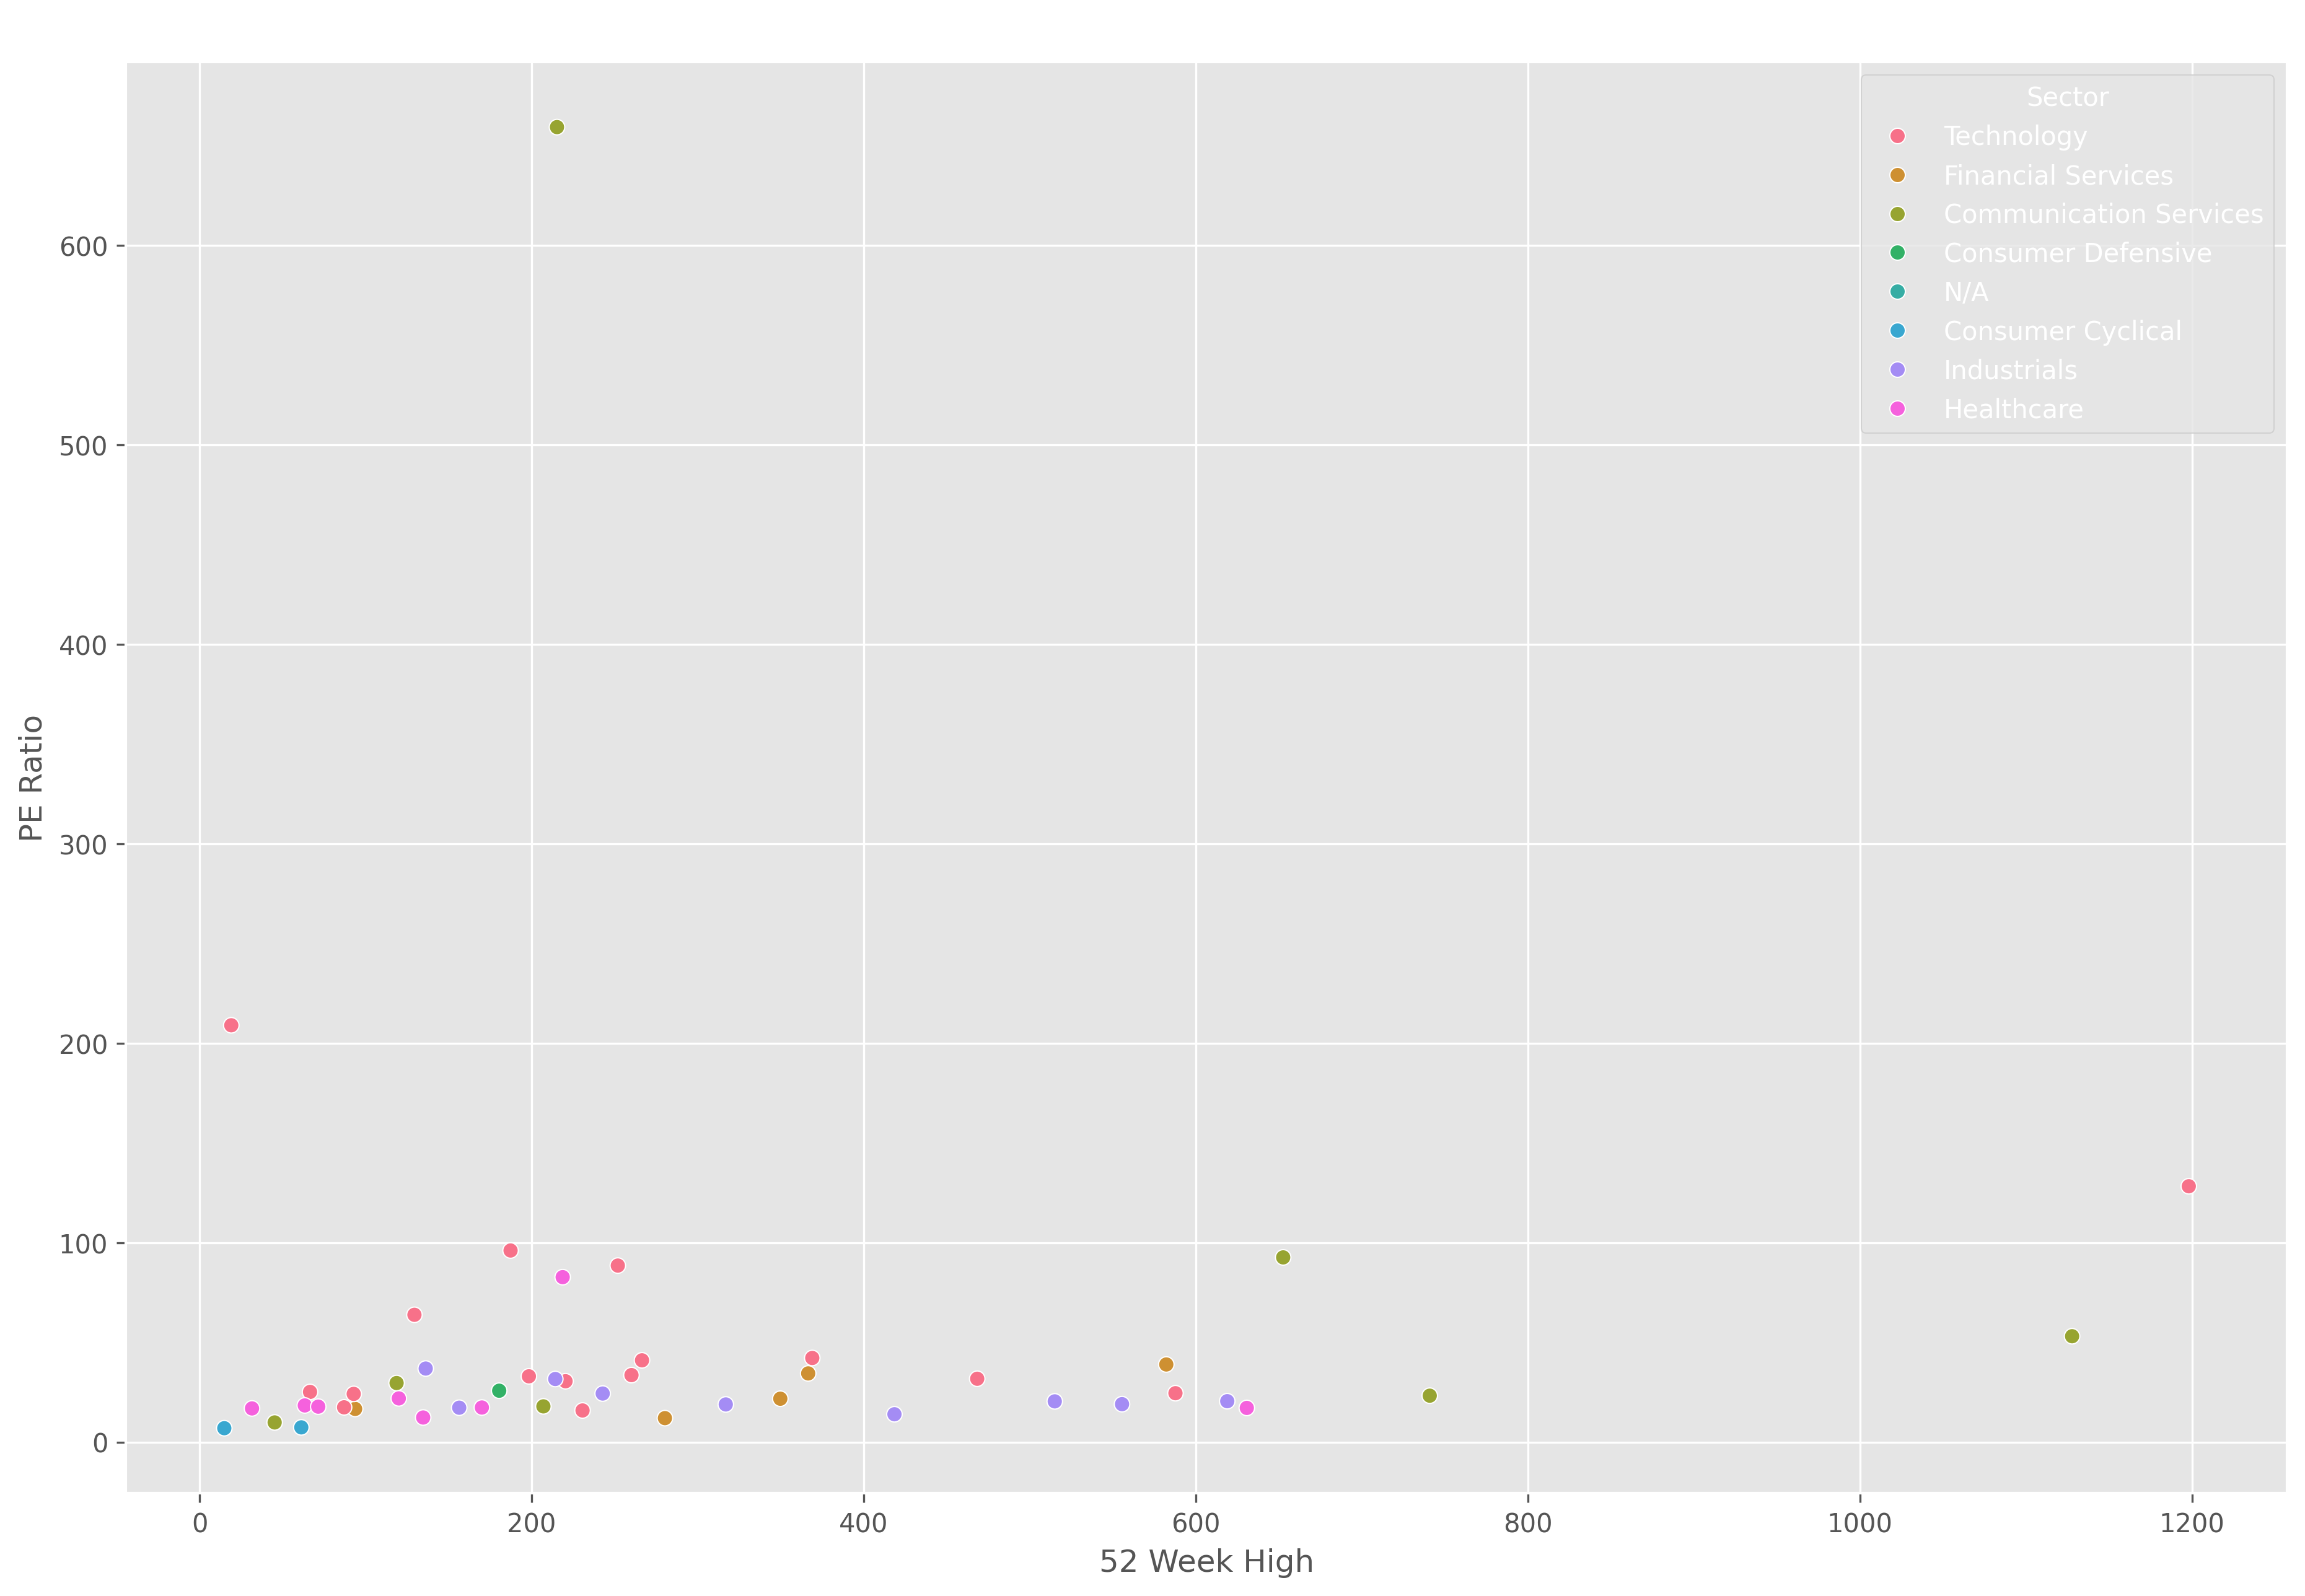

In [ ]:
plt.figure(figsize=(15,10),dpi=300)
sns.scatterplot(df,x="52 Week High",y="PE Ratio",hue="Sector")
plt.title("THis",color="black")
plt.show()